#  Image Classification (cats VS dogs) -second shot

In [97]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import math
import time
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
from sklearn.metrics import confusion_matrix
import splitfolders   #for spiliting data

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

import torchvision
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms

# Our libraries
from train import train_model
from model_utils import *
from predict_utils import *
from vis_utils import *

In [98]:
# some initial setup
np.set_printoptions(precision=2)
use_gpu = torch.cuda.is_available()
np.random.seed(1234)

# Data 
train-
valid-
test-
development

In [99]:
DATA_DIR = '/Users/mahrokh/Desktop/dogs-vs-cats/'
sz = 224
batch_size = 16

In [100]:
os.listdir(DATA_DIR)

['.DS_Store', 'test', 'sampleSubmission.csv', 'train']

In [101]:
os.listdir(DATA_DIR)

['.DS_Store', 'test', 'sampleSubmission.csv', 'train']

In [102]:
trn_dir = f'{DATA_DIR}train'
test_dir = f'{DATA_DIR}test'


In [103]:
os.listdir(trn_dir)

['.DS_Store', 'train']

In [104]:
os.listdir(test_dir)

['.DS_Store', 'test']

In [105]:
trn_fnames = glob.glob(f'{trn_dir}/*/*.jpg')
trn_fnames[:3]

['/Users/mahrokh/Desktop/dogs-vs-cats/train/train/dog.8011.jpg',
 '/Users/mahrokh/Desktop/dogs-vs-cats/train/train/cat.5077.jpg',
 '/Users/mahrokh/Desktop/dogs-vs-cats/train/train/dog.7322.jpg']

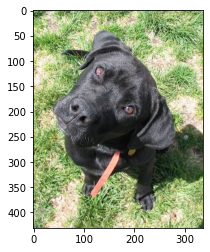

In [106]:
img = plt.imread(trn_fnames[769])
plt.imshow(img);

# transformations:
#### toechvision.transform

In [114]:
tfms = transforms.Compose([transforms.Resize((sz, sz)), 
                          transforms.ToTensor(),
                          transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                          ])

# Dataset:

In [116]:
test_ds = datasets.ImageFolder(test_dir, transform = tfms)

In [117]:
train_ds = datasets.ImageFolder(trn_dir, transform = tfms)

In [118]:
type(train_ds.transform)

torchvision.transforms.transforms.Compose

In [124]:
len(test_ds), len(train_ds)

(12500, 25000)

In [125]:
train_ds.classes

['train']

In [126]:
train_ds.class_to_idx

{'train': 0}

# Dataloaders

In [127]:
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=batch_size,
                                       shuffle=True, num_workers=8)
test_dl = torch.utils.data.DataLoader(test_ds, batch_size=batch_size,
                                       shuffle=True, num_workers=8)

## dataset, dataloader, model
# model: CNN

In [128]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )   
        
        self.fc = nn.Linear(56 * 56 * 32, 2)
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)            # (bs, C, H,  W)
        out = out.view(out.size(0), -1)  # (bs, C * H, W)
        out = self.fc(out)
        return out

In [129]:
model = SimpleCNN()

#transfer model on gpu
if use_gpu:
    model = model.cuda()

# Loss function and optimizer

In [130]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr= 0.02, momentum=0.9 )

In [ ]:
num_epochs = 10
losses = []
for epoch in range(num_epochs):
    for i, (inputs, targets) in enumerate(train_dl):
        inputs = to_var(inputs)
        targets = to_var(targets)
        
        
        # forwad pass
        optimizer.zero_grad()
        outputs = model(inputs)
        
        # loss
        loss = criterion(outputs, targets)
       # losses += [loss.data[0]]
        
        # backward pass
        loss.backward()
       
        # update parameters
        optimizer.step()
        
        # report
        if (i + 1) % 50 == 0:
            print('Epoch [%2d/%2d], Step [%3d/%3d], Loss: %.4f'
          % (epoch + 1, num_epochs, i + 1, len(train_ds) // batch_size,loss.data[0]))